# Niet-Invasieve Prospectietechnieken in de Archeologie
# Werkcollege 2020-2021
---
In this notebook, you have the opportunity to explore FDEM data, perform simple processing steps to make the instrument output more interpretable, and test how these data can be used to provide useful information in archaeological prospection. 

The purpose of this exercise is to get familiarised with the basic form in which geophysical data are outputted, and how you can transform these data to useful information by performing different types of (spatial) data exploration and analysis.

As you see, we are performing this explorative exercise in a Jupyter notebook, which combines computer code (Python) with text instructions (also called 'Markdown').

To advance in the notebook, simply click into a cell (a grey box as the one the text you are reading now is in). When you see a frame appear around the cell, it is activated and can be 'Run'. You can run cells by clicking the 'Run' button above, or by pressing `Shift-Enter`. When you do this, the commands in the cell are being executed. In some cases (for complex processes or when data are being imported) this can take a couple of seconds. As long as the cell is processing the code, you see an asterisk between the square brackets next to the cell, like this `[*]`.

In the first part of the notebook, a brief introduction is given into some concepts related to the coding language you are using. 
***

## *Prelude: A very brief introduction to Python, Jupyter notebooks, and common errors*

*You can skip this section and go straight to [the practical part of the notebook](#Exploring,-analysing-and-plotting-geophysical-survey-data), but if you have no prior coding experience, working through this section is highly recommended.*

Before we dive into processing geophysical data, we'll have a look at the Python language and how Jupyter notebooks work. Python is a general purpose programming language. It is used *everywhere*. It is one of the key languages used by Google, Facebook, Amazon and Spotify. The geospatial software package QGIS uses plugins that are fully coded in Python and are commonly user-developed for use in archaeological geospatial data processing (for instance by INRAP in France). 

As you code, in Python or any other language, you are communicating commands to the computer. The commands you write are then translated to *machine language* and passed onto the computers CPU (its central processing unit). It then executes the desired actions. This means that writing software code is a very precise operation: each symbol or character you put in a line of code is translated to machine language and passed on to the CPU (this includes tabs, spaces, enters, etc.). If anything is incorrect, the CPU will perform an undesired operation, which usually results in an error or a *bug* in the program you have written. 

This is an example of a line of code, which tells the computer to display a formatted message on the screen:
````Python
    print('Hello World')
````
The statement uses the `print()` function. As input it takes a string, here: Hello World. The quotation marks around Hello World (''), tell the computer that is has to consider everything between the quotation marks as a string.

**Try it yourself** and insert the code above (a print statement) in the cell below.

In [9]:
# Hello there! - you are now in a code cell. 
# Notice how text that is preceded by a shebang (#-sign, not a hashtag!) 
# is printed here in cursive. This is to indicate that this is not code, 
# but a text comment that explains what the code does or provides context.
# Every line preceded by a shebang is not passed to the computer.
'''
Alternatively, two times three quotation marks can be used to avoid having to
introduce a shebang at the beginning of each line, as in this comment block.
All the text between the two sets of quotation marks is a comment, i.e. it is
not considered as code by the computer.
'''
# Now, enter your 'print' command below this line, and run the cell


'\nAlternatively, two times three quotation marks can be used to avoid having to\nintroduce a shebang at the beginning of each line, as in this comment block.\nAll the text between the two sets of quotation marks is a comment, i.e. it is\nnot considered as code by the computer.\n'

### Variables
Great, you just wrote your first line of code! 

Now, to work efficiently with data and information that goes into your code, we work with **variables**. You can see these as containers to store information in that can be passed around efficiently in computer programs. For instance, in the box below, the `'Hello World'` string is assigned to the variable `message`.
````Python
    message = 'Hello World'
````
As the string you want to print is now **assigned** to the variable `message`, you can use it to efficiently call the string `'Hello World'` in your code, as in:
````Python
    print(message)
````


In [10]:
# Code the print command but now assign the 'Hello World' string to a variable as in the example above


In the following cells, alongside some standard commands that are required to run this notebook (the [Import modules](#Import-modules) cell, for instance) you will find code with errors (in the [Intendation](#Intendation) section). Try and debug the faulty code to see how this process works, and to make sure you don't make these errors as you advance through the notebook.

Read and execute the following cells carefully, and take the appropriate sets to run these well. Apart from getting aquainted with coding and Python, this is an opportunity to get to know how mathemathecal operators are expressed in Python. 

### Import modules
First, you will import a couple of modules. Modules are simply files with the *.py* extension, which contain Python code. These gives you acces to variables and functions that allow you to perform specific operations on the data we will analyse. 

In [11]:
# Import packages 
# By running this cell you import the modules that are used in this notebook.
# Without running these, some functions that are used will not be accessible 
# by the notebook.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import signal, misc
from scipy import ndimage
from scipy.interpolate import griddata
from IPython.display import HTML, clear_output
from IPython.core.display import display
from ipywidgets import widgets, HBox
%matplotlib inline
run = 0

### Intendation
Python uses whitespace (tabs or spaces) to structure code. This enables grouping specific parts of code (statements) that belong together. Consistent use of intendation is crucial to Python programming, and failure to do so will result in poorly readable code and errors. The default intendation is *four spaces*, which is preferred over using tabs and is the standard adopted by most Python programmers.
[You can find more details on intendation here](https://docs.python.org/2.0/ref/indentation.html), but the two cells below provide examples of similar code with and without an intendation error. Can you find and correct the errors in the second cell?

In [12]:
# Here you see a 'for' loop to illustrate the concept and importance of intendation
# ---------------------------------------------------------------------------------
# First, variables are defined that are called in the loop. 
# We define these in this cell, and will reuse those variables in the cell below
# The notebook thus stores any variable in the virtual memory.

# The variables 'a_list', 'a_value', 'ii'
a_list = [1,2,3,4,5] # a list with 5 integers
a_value = 2 # an integer
ii = [] # an empty list, assigned to variable ii

for i in a_list:
    if i <= a_value: # if i is smaller or equal than a_threshold
        ii.append(i*0) # '*' is the multiplication operator,  
                       # which multiplies a variable x with y as: x*y 
                       # --------------------------------------------
                       # the '.append' after the variable is a specific operation that you can perform on lists
                       # it is an object-specific function.
    else:
        ii.append(i**a_value) # '**' is the exponentiation operator, 
                              # which raises a variable x to the power y as: x**y 

output = sum(ii) # sum the items in the 'ii' list passed through the for loop
print(f"The sum of the items in your list is {output}")
print(ii)

The sum of the items in your list is 50
[0, 0, 9, 16, 25]


In [14]:
# Here you see an alternative version of 'for' loop in the previous cell
# Some annoying errors are popping up here. Things are going wrong, but the
# nice thing is that Python is telling you what kind of error you have.
# The errors here are the consequence of improper use of intendaton. 
# Can you find and correct the intendation errors?

jj = ii # assign variable ii to a new variable jj

for i in a_list:
 if i <= a_value: # if i is smaller or equal than a_threshold
 jj.append(i*0)
else:
    jj.append(i**a_value) # note the operator '**' which raises a variable a to the power be as: a**b
    
 output = sum(jj) # sum the items in the 'jj' list passed through the for loop
print(f"The sum of the items in your list is {output}")
#print(ii)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)

### Variables and argument passing

If you corrected the errors above, and survived without eating your keyboard, you see how the outputs of both cells differ. The sum of the list of values passed through the second loop is higher than that of the output of the first.<br>
In the second cell, the variable `ii` is assigned to variable `jj`. Variable `ii` refers to the list object that is preallocated as an empty list (`ii = []`) before the first [*for* loop](https://wiki.python.org/moin/ForLoop). Equating `jj` to `ii` does not copy the list object, but creates a second referral variable `jj`. Both `jj` and `ii` thus refer to the same object: the list that is populated by evaluating the *if* statement in the first cell. 

In the second loop, the outcomes of the list statement are appended to the object to which `jj` refers, which is the same object as that referred to by `ii`. By printing `ii` after succesfully running the second *for* loop you see how passing `jj` through the loop, that object is modified. If you run the second *for* loops multiple times, you see how output value increases with each run. You effectively append a new version of the loop output to the list object each time you run the cell, the total of which is then summed in the last line. 

If you uncomment the [`print()`](https://docs.python.org/3.8/library/functions.html#print) function in both cells and run these, you print the list object below each cell. You see how running the first cell gives the expected result. In the second cell, however, with each run a new version of the list is appended to it. In the first cell, this is reset by assigning `ii` to an empty list, and subsequently assigning `ii` to `jj` in the second cell.

If you replace `jj = ii` in the second cell by `jj = []`, you equally assign it to an empty list. Printing `jj` instead of `ii` in the final line, shows how this alters the outcome. 

Keep this in mind when running (one or more) cells multiple times. If the mutability of objects is not taken into account, you risk unintentionally (and irrevokably) altering these.

In [15]:
# Here, the code cell above is repeated, but now taking into account the 
# mutability of our listobject. In the beginning of this cell, we create 
# a variable jj and assign a COPY of ii to it, not the original ii list.

jj = ii.copy()
for i in a_list:
    if i <= a_value: # if i is smaller or equal than a_threshold
        jj.append(i*0)
    else:
        jj.append(i**a_value) # note the operator '**' 
                                  # which raises a variable a to the power be as: a**b 
print(jj)  

[0, 0, 9, 16, 25, 0, 0, 9, 16, 25]


# Exploring, analysing and plotting geophysical survey data

Great - the hard part is over! Now we get on the the core of this exercise: working with geophysical survey data. You will be working with a real geophysical dataset, collected for the archaeological investigation of a site in Belgium. Let's go!
***

## Research context

In this explorative exercise, you have at your disposal a dataset collected with a multi-geometry frequency-domain electromagnetic induction instrument. Data were collected in Essen (near Antwerp in the north of Belgium), in a poorly draining Loamy Sand environment (Umbrisol)*°*. The survey was programmed to study the nature and characteristics of a cropmark identified by T. Dekkers (Essen City Council) and verified in 2018 through drone imaging (Fig. 1).

*Fig. 1: Here you see the circular cropmark as recorded at Essen through drone photography, (c) Agentschap Onroerend Erfgoed*
![Cropmark](https://i.imgur.com/HDohRbZ.jpg)
</big></center>



Apart from the aerial observations, no archaeological information is available for the study area. 
Pedologically, the study area is situated on sandy soils. While the local soil map shows little variation, it is known that peat often occurs in the subsurface, which locally adds to the poorly draining character of the soil.

*°*Running the first cell of code, shows you the aerial photograph of the study area, as well as the soil map.

In [16]:

airph = '<iframe src="https://maps.geopunt.be/resources/apps/Minimaps_interface/index.html?lang=nl&id=8ab2729577cee1b901786adaea3904c9" width="500" height="500" ></iframe>'
soilm = '<iframe src="https://maps.geopunt.be/resources/apps/Minimaps_interface/index.html?lang=nl&id=8ab268d177ce560901786adb962404eb" width="500" height="500" ></iframe>'

AerialPhoto = widgets.HTML(airph)
SoilMap = widgets.HTML(soilm)

twinbox = HBox([AerialPhoto, SoilMap])
display(twinbox)

## Survey configuration

The data you have are collected with a FDEM instrument with the following specifications:
- operating frequency: 9000 Hz
- coil geometries:
    1. three coil pairs in HCP mode with Rx at 0.5 m (HCPH), 1.0 m (HCP1), 2.0 m (HCP2) from Tx.
    2. three coil pairs in PRP mode with Rx at 0.6 m (PRPH), 1.1 m (PRP1), 2.1 m (PRP2) from Tx.
- output: IP and QP data in ppt (in dataframe heading indicated with the suffix -IP and -QP, respectively)
- instrument sampling frequency: 10 Hz (number of recordings per second)

FDEM surveying was conducted in a mobile configuration (Fig. 2), with 1.0 m between parallel survey lines and an in-line sampling resolution of 0.25 m.

*Fig. 2: FDEM surveying at Essen*
![FDEMsetup](https://i.imgur.com/Omq0WKl.jpg?2)


Basic processing has been performed, which entails:
- accurate georeferencing and projection to Belgian Lambert72 coordinate system 
- removal of erroneous datapoints (e.g. standstill moments when the survey setup stopped for >5 seconds)
- drift correction (of all IP and QP datasets)

***

# 0. Data exploration
***
Data exploration is the initial step of our journey, in which you can explore a large data set in an unstructured way to uncover initial patterns, characteristics, and points of interest. This process is not meant to reveal every bit of information a dataset holds, but rather to help create a broad picture of important trends and properties to study in greater detail.

Data exploration can use a combination of manual methods and automated tools such as data visualizations, charts, and initial reports. 

By running the cell below, you import python packages that help read, manipulate, analyse and visualise data more easily.

Dataframe exploration
---------------------
Data are often presented in spreadsheets, excel files or dataframes. In python, dataframes are defined as two-dimensional data structures (i.e. data arranged in rows and columns) and can be manipulated with the Pandas package.
The FDEM data you will explore are available as a comma-separated filed (.csv-file), which you can load into a python dataframe (here called 'df') in the next cell. 
After loading the data, you can explore the dataframe directly, either by going through the rows and columns or by looking at its statistics.

In [42]:
# In this cell, you will load the dataset.
# Data are available as a comma-separated file (.csv), a common filetype for (raw) sensor data
# The entire dataset (containing coordinates, timestamps, and sensor data) is assigned to the variable 'df'

df = pd.read_csv('essen.csv', sep=',', header=0)

In [30]:
# Explore first 5 rows of the dataframe
df.head() # the .head function returns the first n rows, and defaults to n=5

# You can activate the two last lines of code in this cell by removing the shebang
# Make sure you leave no space before the line of code you want to run, as this will result in an 'intendation error'
# By activating the lines of code below, you can slice the dataframe yourself

# df.iloc[:5, :] # uncomment (remove the fist # at the beginning of this line) 
# and change the number 5 to a number n to visualise n dataframe rows

,x,y,z,t,HCPHQP,PRPHQP,HCP1QP,PRP1QP,HCP2QP,PRP2QP,HCPHIP,PRPHIP,HCP1IP,PRP1IP,HCP2IP,PRP2IP
0,157660.49,237697.61,13.74,0.00,0.039972,0.047966,0.276606,0.197763,1.265599,1.115632,0.85,0.56,0.82,0.17,0.83,-1.50
1,157660.43,237697.98,13.73,118.58,0.042148,0.032617,0.274829,0.197763,1.308236,1.068625,0.87,0.55,0.81,0.20,0.81,-1.57
2,157660.40,237698.11,13.70,118.69,0.041704,0.032617,0.274829,0.193464,1.336660,1.084294,0.87,0.55,0.81,0.21,0.83,-1.60
3,157660.36,237698.25,13.65,118.79,0.042148,0.032617,0.273052,0.191314,1.357979,1.099963,0.86,0.56,0.82,0.20,0.86,-1.62
4,157660.32,237698.39,13.64,118.89,0.043481,0.034536,0.273052,0.191314,1.357979,1.099963,0.86,0.57,0.82,0.19,0.86,-1.65


In [31]:
# Explore last 5 rows of the dataframe
df.tail() # the .tail function returns the first n rows, and defaults to n=5

# Alternatively, you can slice them yourself
# df.iloc[:-5, :] # uncomment (remove the fist # at the beginning of this line) 
# and change the number 5 to a number n to visualise n dataframe rows
# note the minus to indicate you want to check from the end of the dataframe upward

,x,y,z,t,HCPHQP,PRPHQP,HCP1QP,PRP1QP,HCP2QP,PRP2QP,HCPHIP,PRPHIP,HCP1IP,PRP1IP,HCP2IP,PRP2IP
125701,157840.29,237908.53,12.83,14355.51,0.023495,0.017268,0.151005,0.096732,0.739036,0.488872,0.85,0.54,0.82,0.13,0.88,-1.83
125702,157840.38,237908.34,12.83,14355.61,0.022606,0.015349,0.145675,0.094582,0.767460,0.473203,0.85,0.55,0.82,0.11,0.88,-1.82
125703,157840.48,237908.15,12.83,14355.71,0.022606,0.015349,0.145675,0.090283,0.781673,0.457534,0.85,0.55,0.82,0.11,0.86,-1.80
125704,157840.56,237908.00,12.83,14355.79,0.023050,0.014710,0.143899,0.088134,0.781673,0.449700,0.85,0.54,0.82,0.12,0.86,-1.78
125705,157840.65,237907.79,12.81,14355.89,0.023495,0.014710,0.138569,0.085984,0.781673,0.449700,0.85,0.53,0.82,0.14,0.86,-1.78


In [32]:
# Explore statistics of the complete dataframe
# The .describe function provides the basic statistics of the dataframe you are evaluating.
# In your case, the dataframe is in the variable 'df'

df.describe()

,x,y,z,t,HCPHQP,PRPHQP,HCP1QP,PRP1QP,HCP2QP,PRP2QP,HCPHIP,PRPHIP,HCP1IP,PRP1IP,HCP2IP,PRP2IP
count,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125705.000000
mean,157728.902742,237821.430566,13.215950,7160.525937,0.037187,0.027852,0.228140,0.162353,1.045551,0.844694,0.854507,0.544584,0.822223,0.140663,0.838225,-1.927005
std,53.456220,61.466964,0.201906,4118.036795,0.015173,0.018912,0.058447,0.089749,0.187704,0.251597,0.022730,0.038402,0.087894,0.131508,0.149204,0.282695
min,157617.600000,237692.620000,12.530000,0.000000,-0.373160,-0.048606,-0.351220,-0.159070,-6.411848,-0.101065,0.390000,-0.430000,-1.930000,-2.540000,-16.660000,-9.950000
25%,157684.860000,237770.682500,13.040000,3546.100000,0.029979,0.019826,0.192753,0.120378,0.927348,0.669066,0.850000,0.540000,0.810000,0.120000,0.820000,-2.010000
50%,157729.260000,237825.360000,13.230000,7126.615000,0.036685,0.025582,0.227573,0.156921,1.041046,0.843775,0.850000,0.550000,0.820000,0.140000,0.830000,-1.920000
75%,157771.967500,237872.607500,13.350000,10629.025000,0.042770,0.033257,0.259018,0.193464,1.160429,0.991063,0.860000,0.560000,0.830000,0.160000,0.850000,-1.830000
max,157841.670000,237937.550000,13.740000,14355.890000,1.531723,2.031212,4.512916,9.385153,12.580666,11.804229,4.180000,4.740000,14.550000,20.650000,14.090000,33.270000


Checking dataset properties
---------------------
In the following cells, you will check the sampling interval of the dataset. In other words, you will check how many datapoints have been collected per second. This gives you the **sampling frequency**. When you combine this with the survey speed, you get the approximate sampling resolution.

In [33]:
# How long did the survey take?
# Assign a value to the variable 'total_time' by performing an operation on the column that holds 
# the data timestamps (column 't'). You call dataframe columns by entering: df['columnname'].values[].

total_time = (df['t'].values[-1] - df['t'].values[0])  # the total survey time in seconds
sampling_points = df['t'].count() # the total number of collected datapoints during the entire survey

# What was the sampling frequency of the survey?  
# Replace the square brackets ([]) in the line below with an equation to determine the sampling frequency
sampling_frequency = [] # can you write an equation here to determine the sampling frequency?
                        # (i.e. how many points were collected per second?)

# Print statements
if total_time:
    print('The FDEM survey at Essen took {0:.2f} hours.'.format(total_time / 3600))
if sampling_frequency:
    print('The sampling frequency of the survey was approximately {0:.2f} Hz.'.format(sampling_frequency))

The FDEM survey at Essen took 3.99 hours.


In [34]:
# What was the sampling frequency of the survey?
corrected_sampling_frequency = 1 / np.median(np.diff(df['t'].values))  # Hz

# Print statements
print('A more correct approximation of the sampling frequency would be {0:.2f} Hz.'.format(corrected_sampling_frequency))

A more correct approximation of the sampling frequency would be 10.00 Hz.


Data visualization
------------------
Plotting the data provides new insights in the data.

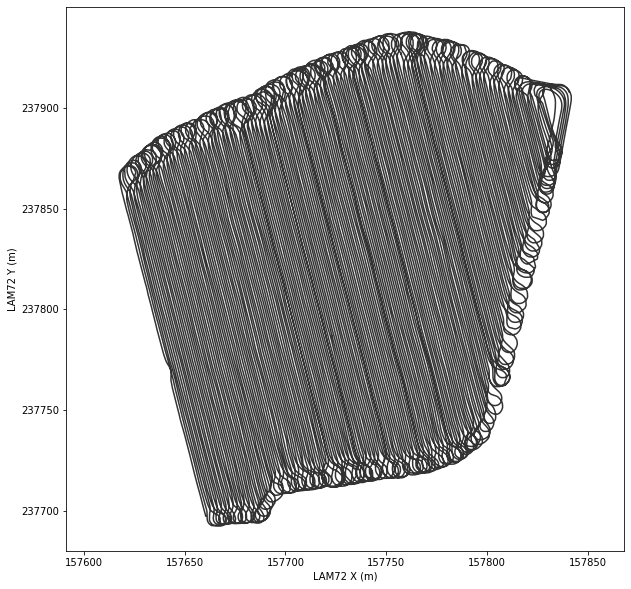

In [35]:
# Visualize GPS coordinates
plt.figure(figsize=(10, 10))
plt.plot(df['x'].values, df['y'].values, 'k', alpha=.8)
plt.axis('equal')
plt.xlabel('LAM72 X (m)')
plt.ylabel('LAM72 Y (m)')
plt.show()

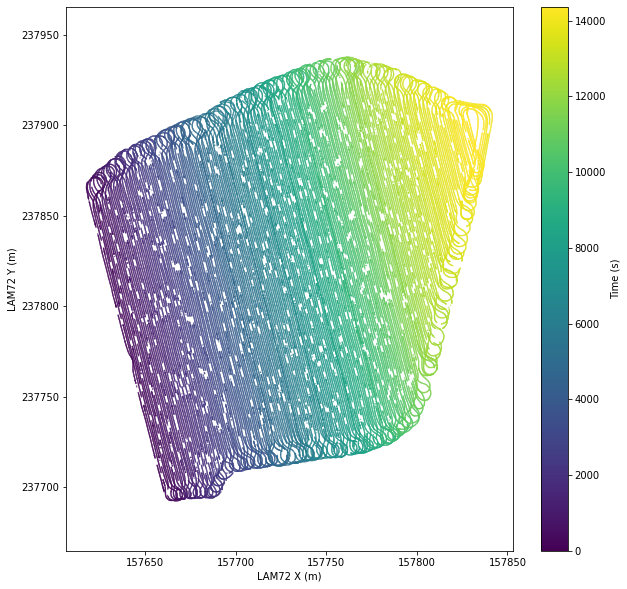

In [36]:
# Visualize time throughout the survey
plt.figure(figsize=(10, 10))
plt.scatter(df['x'].values, df['y'].values, c=df['t'].values, s=.1, cmap='viridis')
plt.colorbar().set_label('Time (s)')
plt.axis('equal')
plt.xlabel('LAM72 X (m)')
plt.ylabel('LAM72 Y (m)')
plt.show()

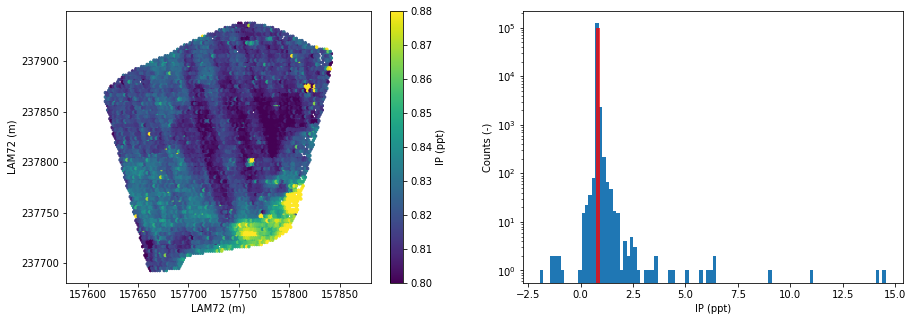

In [37]:
# Coil configuration
cgeometry = 'HCP1' # specify coil geometry (HCPH, HCP1, HCP2, PRPH, PRP1, PRP2)
cresponse ='IP'    # specify signal component (IP or QP)

# Colorbar range
cmin_percentile = 2  # %
cmax_percentile = 98  # %

cc = cgeometry + cresponse

# Visualize the survey itself
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hexbin(df['x'].values, df['y'].values, C=df[cc].values)
plt.colorbar().set_label(cresponse + ' (ppt)')
plt.clim(np.percentile(df[cc].values, cmin_percentile), np.percentile(df[cc].values, cmax_percentile))
plt.gca().set_ylabel(cresponse +' (ppt)')
plt.axis('equal')
plt.xlabel('LAM72 (m)')
plt.ylabel('LAM72 (m)')

plt.subplot(1, 2, 2)
plt.hist(df[cc].values, bins=100, log=True)
plt.vlines([np.percentile(df[cc].values, cmin_percentile), np.percentile(df[cc].values, cmax_percentile)], 0, 1e5, colors='red')
plt.xlabel(cresponse +' (ppt)')
plt.ylabel('Counts (-)')
plt.show()

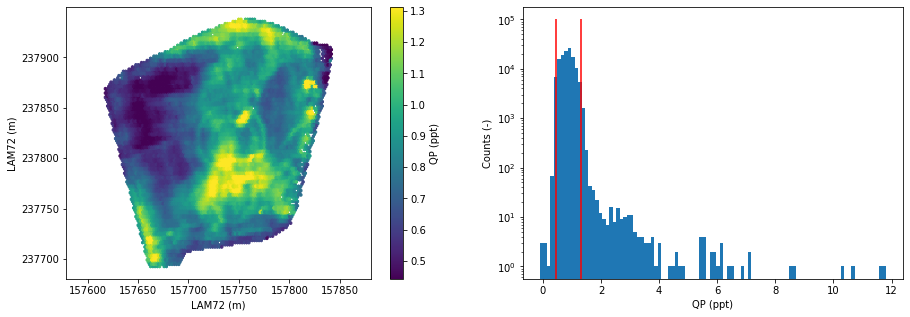

In [38]:
# Coil configuration
cgeometry = 'PRP2' # specify coil geometry (HCPH, HCP1, HCP2, PRPH, PRP1, PRP2)
cresponse ='QP'    # specify signal component (IP or QP)

# Colorbar range
cmin_percentile = 2  # %
cmax_percentile = 98  # %

cc = cgeometry + cresponse

# Visualize the survey itself
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hexbin(df['x'].values, df['y'].values, C=df[cc].values)
plt.colorbar().set_label(cresponse + ' (ppt)')
plt.clim(np.percentile(df[cc].values, cmin_percentile), np.percentile(df[cc].values, cmax_percentile))
plt.gca().set_ylabel(cresponse +' (ppt)')
plt.axis('equal')
plt.xlabel('LAM72 (m)')
plt.ylabel('LAM72 (m)')

plt.subplot(1, 2, 2)
plt.hist(df[cc].values, bins=100, log=True)
plt.vlines([np.percentile(df[cc].values, cmin_percentile), np.percentile(df[cc].values, cmax_percentile)], 0, 1e5, colors='red')
plt.xlabel(cresponse +' (ppt)')
plt.ylabel('Counts (-)')
plt.show()

# 1. Obtaining an apparent measure for electrical conductivity
--------------------------------------

One of the main contributions for ground-based FDEM in relating the (complex) instrument responses to a subsurface physical property is provided by McNeill (1980), who introduced the concept of apparent electrical conductivity (ECa or $\sigma_a$) (see lesson slides on FDEM). 
This measure represents an electrical conductivity for the ‘apparent’ homogenous subsurface volume that generates the acquired FDEM response. An ECa estimation introduces a more comprehensible value compared to the complex FDEM response, which facilitates data analysis, representation and practical interpretation, without using parameterized inversion methods. 
However, the ECa cannot be used to obtain accurate depth information nor true electrical conductivity values of the subsurface. Note the distinction between electrical conductivity (true physical property occurring in the subsurface) and ECa (theoretical property of an apparent homogenous subsurface).
The approximation this only valid within specific boundary conditions. 
Given the information on the study area, do you think these are met?

In the cell below you define a function (`mcneill_eca`), that incorporates the instrument properties (`frequency` and `coil spacing`) to convert a specific signal component (`signal`) to apparent electrical conductivity.
You can do this by transforming the instrument output data (the `signal`) to $\mathrm{\sigma}_{a}$ (or `eca` in the code box below) by using the equation:

$$\mathrm{\sigma}_{a} = \frac{4}{\omega\mathrm{\mu}_{0}{s}^{2}} \frac{\mathrm{H}_{s}}{\mathrm{H}_{p}}$$

The final term of the equation ($\frac{\mathrm{H}_{s}}{\mathrm{H}_{p}}$) represents the signal component that can be transformed to ECa (i.e. `qp` or `ip`).

In [45]:
def mcneill_eca(signal, frequency, coil_spacing):
    """
    Calculate the apparent electrical conductivity (ECa) based on the raw sensor output (Hs/Hp in ppt) 
    provided in the dataframe.

    >> insert the relevant equation between the square brackets below, 
    >> assigning the output to the variable eca (eca = []) 

    """

    # Constants 
    PI = np.pi
    MU_0 = 4 * PI * 10 ** (-7)
    
    # Angular frequency
    angular_frequency = (9000*2*PI)

    # Equation to transform the appropriate signal response to ECa, using the low-induction number approximation
    # REPLACE THE SQUARE BRACKETS BY THE CORRECT EQUATION
    eca = (4 * signal)/(angular_frequency * MU_0 * (coil_spacing**2)) #
    return eca

## Converting the relevant datasets to LIN ECa values
--------------------------------------

Based on the function you defined above, you can now loop over the relevant signal component (IP or QP) for all coil configurations.
In the first cell below, your function (mcneill_eca) is inserted into a loop. 

Next, you can evaluate the data statistics once again. Check the statistics for the signal components you converted to LIN ECa. Do these provide you with more information on the study area?

In the final cell you can visualise the outcomes and plot the relevant datasets in ECa values, making it easier to interpret variation present in the datasets.

In [49]:
# Define coil spacings
coil_spacings = [.5, .6, 1., 1.1, 2., 2.1]
cresponse = 'QP'    # specify signal component that has been transformed to LIN ECa data (IP or QP)

if cresponse != 'IP':
    coln = 4
else:
    coln = 5

# check to make sure you work on the original dataframe, so you do not transform
# values to ECa multiple times (as in the introduction above on passing mutable variables)

if run >= 0:
    df = pd.read_csv('essen.csv', sep=',', header=0)
    
# Loop through coil configurations

for ii, coil_spacing in enumerate(coil_spacings):
    # Calculate McNeill ECa (mS/m)
    df.iloc[:, coln + ii] = mcneill_eca(df.iloc[:, coln + ii].values, 9000, coil_spacing)
run = 1

In [51]:
# Explore statistics of the complete dataframe after converting to LIN ECa
df.describe() 

,x,y,z,t,HCPHQP,PRPHQP,HCP1QP,PRP1QP,HCP2QP,PRP2QP,HCPHIP,PRPHIP,HCP1IP,PRP1IP,HCP2IP,PRP2IP
count,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125705.000000
mean,157728.902742,237821.430566,13.215950,7160.525937,8.372996,4.354893,12.841900,7.552687,14.713401,10.781727,0.854507,0.544584,0.822223,0.140663,0.838225,-1.927005
std,53.456220,61.466964,0.201906,4118.036795,3.416431,2.957112,3.289947,4.175133,2.641437,3.211406,0.022730,0.038402,0.087894,0.131508,0.149204,0.282695
min,157617.600000,237692.620000,12.530000,0.000000,-84.020000,-7.600000,-19.770000,-7.400000,-90.230000,-1.290000,0.390000,-0.430000,-1.930000,-2.540000,-16.660000,-9.950000
25%,157684.860000,237770.682500,13.040000,3546.100000,6.750000,3.100000,10.850000,5.600000,13.050000,8.540000,0.850000,0.540000,0.810000,0.120000,0.820000,-2.010000
50%,157729.260000,237825.360000,13.230000,7126.615000,8.260000,4.000000,12.810000,7.300000,14.650000,10.770000,0.850000,0.550000,0.820000,0.140000,0.830000,-1.920000
75%,157771.967500,237872.607500,13.350000,10629.025000,9.630000,5.200000,14.580000,9.000000,16.330000,12.650000,0.860000,0.560000,0.830000,0.160000,0.850000,-1.830000
max,157841.670000,237937.550000,13.740000,14355.890000,344.880000,317.600000,254.030000,436.600000,177.040000,150.670000,4.180000,4.740000,14.550000,20.650000,14.090000,33.270000


In [ ]:
# Set coil configuration and component
cgeometry = 'HCP1'  # specify coil geometry (HCPH, HCP1, HCP2, PRPH, PRP1, PRP2)
cresponse = 'QP'    # specify signal component that has been transformed to LIN ECa data (IP or QP)

cc = cgeometry + cresponse

# Colorbar range -- You can adjust the map dynamics by 
# changing the minimum (cmin) and maximum (cmax) colorscale values
# cmin = 0  # ECa (mS/m)
# cmax = 10 # ECa (mS/m)

cmin = np.percentile(df[cc].values, 2)
cmax = np.percentile(df[cc].values, 99)

# Plot the surveydata
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['x'].values, df['y'].values, c=df[cc].values, s=1)
plt.colorbar().set_label('ECa (mS/m)')

plt.clim(cmin, cmax)
plt.axis('equal')
plt.xlabel('LAM72 X (m)')
plt.ylabel('LAM72 Y (m)')

plt.subplot(1, 2, 2)
plt.hist(df[cc].values, log=True, bins=100)
plt.vlines([cmin, cmax], 0, 1e5, colors='red')
plt.show()

# 2. Spatial interpolation
---

If we want to move the data space from scattered point observations towards evenly spread observations or raster data we need to make use of a spatial interpolation algorithm.
Examples of these algorithms include nearest neighbor interpolation, linear and cubic interpolation.

Perform such an interpolation in the cells below.

Define an evenly spaced grid to which the algorithm has to interpolate to.
The interpolation takes the [convex hull](https://en.wikipedia.org/wiki/Convex_hull) as standard boundaries for the interpolation. 
Explain how this can result in extrapolation and what the possible effects are.
Determine what the effect of interpolation method is by selecting different methods (, method='').

You can determine which dataset you want to interpolate, by setting the coil geometry, and by adding the signal component you want to evaluate (IP or QP data, the latter dataset has been transformed into ECa data by the procedure you implemented above).

Each dataset you interpolate is exported as a jpeg into your home folder

In [ ]:
# Input variables

cgeometry = 'PRP1'  # specify coil geometry (HCPH, HCP1, HCP2, PRPH, PRP1, PRP2)
cresponse = 'QP'    # specify signal component that has been transformed to LIN ECa data (IP or QP)

CELL_SIZE = 0.5  # cell size in meters



# Interpolate to new arrays/coordinates
cc = cgeometry + cresponse
if cresponse == 'QP':
    ptlab = 'ECa'
else:
    ptlab = cresponse
    
pttl1 = f'Original {cgeometry} {ptlab} data'

x_min = df['x'].min()
x_max = df['x'].max()
y_min = df['y'].min()
y_max = df['y'].max()
x_vector = np.arange(x_min, x_max, CELL_SIZE)
y_vector = np.arange(y_min, y_max, CELL_SIZE)

# Interpolate
xx, yy = np.meshgrid(x_vector, y_vector)
zz = griddata(np.vstack((df['x'].values, df['y'].values)).T, df[cc].values, (xx, yy), method='linear')  # other methods (nearest, cubic)

In [ ]:
if cresponse == 'QP':
    dlab ='ECa (mS/m)'
else:
    dlab ='IP (ppt)'

fig = plt.figure(figsize=(10, 10))
plt.imshow(zz, origin='lower', extent=[x_min, x_max, y_min, y_max])  
plt.colorbar().set_label(dlab)
plt.clim(np.percentile(df[cc].values, 2), np.percentile(df[cc].values, 99))
plt.axis('equal')
plt.xlabel('LAM72 X (m)')
plt.ylabel('LAM72 Y (m)')
plt.title(pttl1)
# Export output as jpeg (to home folder)
plt.savefig(f"{cc}_original.jpeg")
plt.show()

# 3. Filtering data

Here you will filter the interpolated survey data through convolution. You will convolve the data with a kernel that you specify in the cell below. Check the properties of all kernels and see what they look like in the plots below.

After you've done this, you can set the type of filter you want to implement on your dataset and evaluate its effect. As with the original dataset, your output is exported as a jpeg file to your home folder.

Check how you each filter perfoms and which type of information is enhanced or reduced. Can you spot any strange things happening with the data (such as the introduction of artefacts?)

In [ ]:
# In this cell, different kinds of filter kernels are designed and plotted below as output

kl = 25       # kernel length for gaussian low pass
sd = kl/1.25  # filter amplitude (times std)

## Low pass kernel (gaussian)
def gkern(kernlen=kl, std=sd):
    """Returns a 2D Gaussian kernel array."""
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    return np.outer(gkern1d, gkern1d)

lowpass = gkern()

## Three-pixel high pass kernel
sharpen = np.array([[0, -1, 0], 
                     [-1, 8, -1], 
                     [0, -1, 0]])

## Five-pixel high pass kernel
sharpen2 = np.array([[-1, -1, -1, -1, -1],
                [-1,  1,  3,  1, -1],
                [-1,  3, 8, 3, -1],
                [-1,  1,  3,  1, -1],
                [-1, -1, -1, -1, -1]])

## Local averaging kernel (smoothing)
mean = np.array([[1/9, 1/9, 1/9],
                [1/9, 1/9, 1/9],
                [1/9, 1/9, 1/9]])

## Prewitt edge enhancement
s_order = 1 # determine edge enhancement filter order (1 = first order; 2 = 2nd order, ...)
edge = np.array([[1,1,1],
                 [0,0,0],
                 [-1,-1,-1]])

# Normalise kernels 
a_sum = np.sum(lowpass)
lowpass = lowpass/a_sum

a_sum = np.sum(sharpen)
sharpen = sharpen/a_sum

a_sum = np.sum(sharpen2)
sharpen2 = sharpen2/a_sum

edge_s = edge*s_order
edge_e = edge.transpose()*s_order
edge_n = (np.flipud(edge))*s_order
edge_w = (np.fliplr(edge.transpose()))*s_order

edge_e = (edge_w*-1)
edge_s = (edge_s*-1)


# Visualising the kernels (plotting)
plt.subplot(1, 5, 1)
plt.imshow(lowpass, interpolation='none')
plt.title('Low Pass')
plt.colorbar(orientation="horizontal")

plt.subplot(1, 5, 2)
plt.imshow(sharpen, interpolation='none')
plt.title("Sharpen")
plt.colorbar(orientation="horizontal")

plt.subplot(1, 5, 3)
plt.imshow(edge_s, interpolation='none')
plt.title("Edge NS")
plt.colorbar(orientation="horizontal")

plt.subplot(1,5, 4)
plt.imshow(edge_e, interpolation='none')
plt.title("Edge EW")
plt.colorbar(orientation="horizontal")

plt.subplot(1, 5, 5)
plt.imshow(mean, interpolation='none')
plt.title("Mean")
plt.colorbar(orientation="horizontal")


In [ ]:
# Here you can apply the filters you designed, on the dataset you have just interpolated.
# You can determine which kernel to convolve with the dataset, by specifying it in the cell
# below. Just change string to one of the options after the shebang, but make sure
# you use the quotation marks ('') around the string!

f_type = 'edge_e' # 'lowpass', 'sharpen', 'edge_e', 'edge_s', mean', or 'highpass'

# Filtering

if f_type == 'lowpass' or f_type == 'highpass':
    f_out = signal.convolve2d(zz, lowpass,mode='same', boundary='symm', fillvalue=0)
elif f_type == 'sharpen':
    f_out = signal.convolve2d(zz, sharpen,mode='same', boundary='symm', fillvalue=0)
elif f_type == 'edge_e':
    f_out = signal.convolve2d(zz, edge_e,mode='same', boundary='symm', fillvalue=0)
elif f_type == 'edge_s':    
    f_out = signal.convolve2d(zz, edge_s,mode='same', boundary='symm', fillvalue=0)
elif f_type == 'mean':
    f_out = signal.convolve2d(zz, mean,mode='same', boundary='symm', fillvalue=0)
elif f_type == 'edge_w':
    f_out = signal.convolve2d(zz, edge_w,mode='same', boundary='symm', fillvalue=0)
elif f_type == 'edge_n':
    f_out = signal.convolve2d(zz, edge_n,mode='same', boundary='symm', fillvalue=0)
elif f_type == 'sharpen2':
    f_out = signal.convolve2d(zz, sharpen2,mode='same', boundary='symm', fillvalue=0)


# High-pass data if requested, else assign variable
if f_type == 'highpass':
    filtered_n = zz - f_out
else:
    filtered_n = f_out
    
pttl2= f'{cgeometry} {ptlab} data filtered with {f_type} filter'
    
cmin = np.nanpercentile(filtered_n, 2)
cmax = np.nanpercentile(filtered_n, 98)

fig = plt.figure(figsize=(10, 10))
plt.imshow(filtered_n, origin='lower', extent=[x_min, x_max, y_min, y_max])
plt.clim(cmin,cmax)
plt.colorbar().set_label(dlab)   

plt.axis('equal')
plt.xlabel('LAM72 X (m)')
plt.ylabel('LAM72 Y (m)')
plt.title(pttl2)
# Export output as jpeg (to home folder)
plt.savefig(f"{cc}_{f_type}.jpeg")
plt.show()

# Plot original data for comparison 
fig = plt.figure(figsize=(10, 10))
plt.imshow(zz, origin='lower', extent=[x_min, x_max, y_min, y_max])
if cresponse == 'QP':
    dlab ='ECa (mS/m)'
else:
    dlab ='IP (ppt)'   
    
plt.colorbar().set_label(dlab)
plt.clim(np.percentile(df[cc].values, 2), np.percentile(df[cc].values, 99))
plt.axis('equal')
plt.xlabel('LAM72 X (m)')
plt.ylabel('LAM72 Y (m)')
pttl3= f'{pttl1} for comparison to filter output'
plt.title(pttl3)
plt.show()